# Cleaning Data with Pandas

### Loading and viewing your data

In [1]:
import pandas as pd

Read the file into DataFrame

In [4]:
# Add low_memory=False to surpass warning
df = pd.read_csv('dob_job_application_filings_subset.csv', low_memory=False)

In [10]:
print(df.head(3))

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...            MARKOWITZ                        

              Owner's Business Name Owner's House Number  \
0  MACKLOWE MANAGEMENT                      126            
1  NA                                       107            
2  635 RIVERSIDE DRIVE NY LLC               6

In [11]:
print(df.tail(2))

           Job #  Doc #        Borough       House #  \
12844  320771704      1       BROOKLYN  499            
12845  520143951      1  STATEN ISLAND  1755           

                            Street Name  Block  Lot    Bin # Job Type  \
12844  UNION STREET                        431   43  3007185       A2   
12845  RICHMOND ROAD                       887   28  5022931       A2   

      Job Status           ...                         Owner's Last Name  \
12844          D           ...            WIGGINS                          
12845          D           ...            CAMBRIA                          

                  Owner's Business Name Owner's House Number  \
12844  N/A                                      77             
12845  RONALD CAMBRIA                           1755           

               Owner'sHouse Street Name            City  State    Zip  \
12844  PROSPECT PLACE                    BROOKLYN           NY  11217   
12845  RICHMOND ROAD                     ST

In [8]:
print(df.shape)

(12846, 82)


In [9]:
print(df.columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

Select subset of columns for further processing

In [16]:
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories', 'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

In [17]:
df_subset.columns

Index(['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee',
       'Existing Zoning Sqft', 'Proposed Zoning Sqft',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height'],
      dtype='object')

In [18]:
print(df_subset.info())
print(df_subset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB
None
(12846, 13)


In [19]:
print(df_subset.head(3))

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143                       0                        0   
2                0                       5                        5   

   Existing Height  Proposed Height  
0                0                0  
1                0                0  
2               54               54  


### Exploratory data analysis

Calculating summary statistics
`.descrivbe()` can be used only on numeric columns

In [20]:
df_subset.describe()

,Job #,Doc #,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,1.284600e+04,12846.000000,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000
mean,2.426788e+08,1.162930,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562
std,1.312507e+08,0.514937,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666
min,1.036438e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216206e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000
50%,2.202645e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000
75%,3.208652e+08,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000
max,5.400246e+08,9.000000,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000


For categorical data you can use `.value_counts()`

In [22]:
print(df_subset['Borough'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64


In [26]:
print(df.State.value_counts(dropna=False))

NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
MD        7
DC        7
GA        6
MA        6
KS        6
VA        5
CO        4
SC        3
MN        3
AZ        3
WI        3
RI        2
UT        2
NC        2
MI        1
IN        1
WA        1
VT        1
NM        1
Name: State, dtype: int64


In [27]:
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


### Visual exploratory data analysis

Visualizing single variables with histograms
Import matplotlib

In [29]:
import matplotlib.pyplot as plt

In [33]:
df_subset['Existing Zoning Sqft'].describe()

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

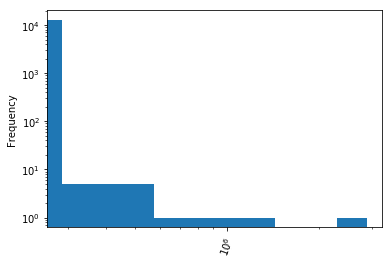

In [32]:
df_subset['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)
plt.show()

### Reshaping your data using melt

In [41]:
airquality = pd.read_csv('airquality.csv')

In [42]:
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [43]:
airquality.shape

(153, 6)

In [44]:
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'])

In [45]:
airquality_melt.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


In [46]:
airquality_melt.shape

(612, 4)

Customizing melted data

In [47]:
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

In [48]:
airquality_melt.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


### Pivoting data
opposite fo melting

In [50]:
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

In [51]:
airquality_pivot.head()

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3

Resetting the index of a DataFrame

In [52]:
airquality_pivot.index

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 

In [53]:
airquality_pivot_reset = airquality_pivot.reset_index()

In [54]:
airquality_pivot_reset.index

RangeIndex(start=0, stop=153, step=1)

In [55]:
airquality_pivot_reset.head()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3


### Splitting a column with .str  
Preloading another dataset

In [56]:
tb = pd.read_csv('tb.csv')

In [57]:
tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


- melt tb
- create gender column
- create age_group column

In [60]:
tb_melt = pd.melt(frame=tb, id_vars=['country', 'year'])
tb_melt.head()

,country,year,variable,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


In [62]:
tb_melt['gender'] = tb_melt.variable.str[0]
tb_melt['age_group'] = tb_melt.variable.str[1:]
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


### Splitting a column with .split() and .get()

In [63]:
ebola = pd.read_csv('ebola.csv')

In [65]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


- melt ebola
- create the str_split column
- create the type column
- create the country column

In [68]:
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')
ebola_melt.head()

,Date,Day,type_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [70]:
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')
ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [71]:
ebola_melt['type'] = ebola_melt.str_split.str.get(0)
ebola_melt['country'] = ebola_melt.str_split.str.get(1)
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea
